# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Soution:  

As stated in assignment that the client (a used car dealership) wants to understand what factors influence the price of used cars. This will help them price their inventory more effectively and identify what features consumers value.

Now if we want to change this as a data task, we can say that this is a **regression problem** where we predict the continuous variable `price` based on features like `year`, `manufacturer`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `transmission`, etc. Our goal is to identify which of these features have the most significant impact on the price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [66]:
import pandas as pd

#Load the Dataset
file_path = 'data/vehicles.csv'  # Update this if your file is in a different location
df = pd.read_csv(file_path)

#View the First Few Rows
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [68]:
#Check Data Types and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [70]:
#Get Summary Statistics for Numerical and Categorical Data
df.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#Identify columns with missing data to decide whether to impute or drop them.
df.isnull().sum().sort_values(ascending=False)

size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
id                   0
region               0
price                0
state                0
dtype: int64

In [74]:
#Check if any duplicate records exist.
df.duplicated().sum()

0

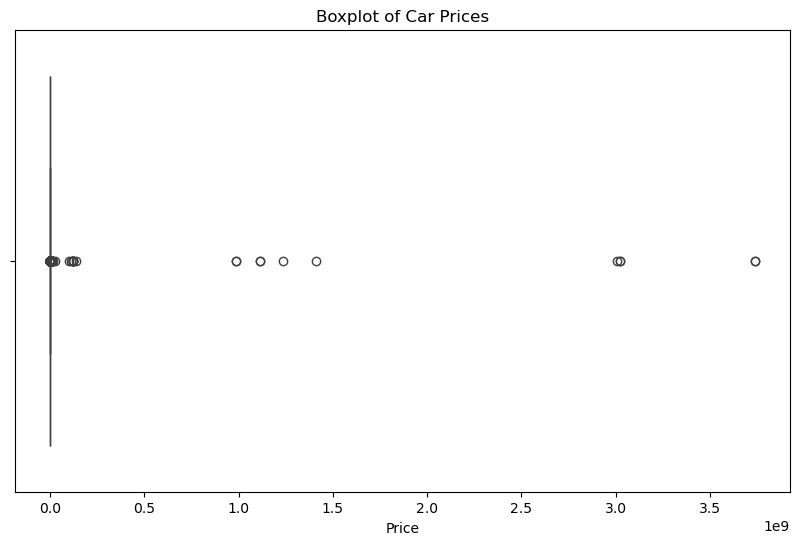

In [76]:
#Outliers in Key Variables (e.g., Price, Odometer)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

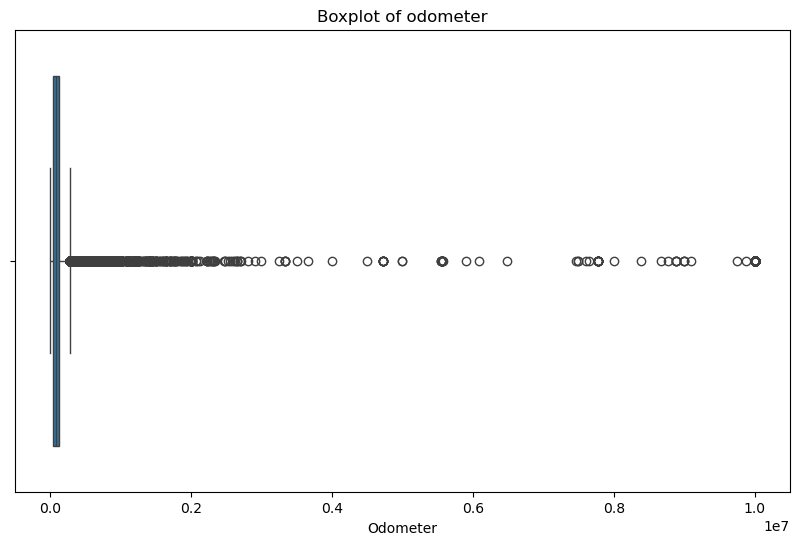

In [78]:
#Outliers in Key Variables (e.g., Price, Odometer)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('Odometer')
plt.show()

In [80]:
#Helps identify typos or inconsistencies in categories.
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:10]}")  # Display first 10 unique values for each column

region: ['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham']
manufacturer: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac']
model: [nan 'sierra 1500 crew cab slt' 'silverado 1500' 'silverado 1500 crew'
 'tundra double cab sr' 'f-150 xlt' 'sierra 2500 hd extended cab'
 'silverado 1500 double' 'tacoma' 'colorado extended cab']
condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
cylinders: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
title_status: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
transmission: [nan 'other' 'automatic' 'manual']
VIN: [nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' '3GCPWCED5LG130317'
 '5TFRM5F17HX120972' '1GT220CG8CZ231238' '1GCVKREH6GZ228691'
 '1GCHTCE37G1186784' '1G1YR3DW3B51021

In [82]:
# Check the number of unique values for each column
unique_values = df.nunique().sort_values(ascending=False)

# Display the columns with the most unique values first
print(unique_values)

id              426880
VIN             118246
odometer        104870
model            29649
price            15655
region             404
year               114
state               51
manufacturer        42
type                13
paint_color         12
cylinders            8
condition            6
title_status         6
fuel                 5
size                 4
transmission         3
drive                3
dtype: int64


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [85]:
#Remove Irrelevant Columns. Columns with high missing values. (around 50%).
df.drop(['id', 'VIN', 'cylinders','region', 'paint_color', 'model'], axis=1, inplace=True)

In [87]:
#Remove Rows with Unrealistic Prices
df = df[(df['price'] > 100) & (df['price'] < 100000)]

In [89]:
# Impute with 'unknown' or common categories for categorical features
impute_unknown_cols = ['condition', 'drive', 'type', 'manufacturer', 'title_status', 'fuel', 'transmission','size']
for col in impute_unknown_cols:
    df[col].fillna('unknown', inplace=True)

/var/folders/90/j2y5cj7s5jv2vjyrkcpbk4qm0000gn/T/ipykernel_30546/604312873.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown', inplace=True)


In [91]:
# Impute with median for numerical features
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)

/var/folders/90/j2y5cj7s5jv2vjyrkcpbk4qm0000gn/T/ipykernel_30546/800435491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
/var/folders/90/j2y5cj7s5jv2vjyrkcpbk4qm0000gn/T/ipykernel_30546/800435491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [93]:
#Verify No Missing Values Remain
missing_data_after_cleaning = df.isnull().sum()
missing_data_after_cleaning

price           0
year            0
manufacturer    0
condition       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
state           0
dtype: int64

In [95]:
# Display the first few rows of the cleaned dataset
df.head()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,size,type,state
0,6000,2013.0,unknown,unknown,unknown,87268.0,unknown,unknown,unknown,unknown,unknown,az
1,11900,2013.0,unknown,unknown,unknown,87268.0,unknown,unknown,unknown,unknown,unknown,ar
2,21000,2013.0,unknown,unknown,unknown,87268.0,unknown,unknown,unknown,unknown,unknown,fl
3,1500,2013.0,unknown,unknown,unknown,87268.0,unknown,unknown,unknown,unknown,unknown,ma
4,4900,2013.0,unknown,unknown,unknown,87268.0,unknown,unknown,unknown,unknown,unknown,nc


In [97]:
# Feature Engineering
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create 'car_age' feature from 'year'
df['car_age'] = 2025 - df['year']

# Drop 'year' as we now have 'car_age'
df.drop('year', axis=1, inplace=True)

#Scaling Numerical Features
scaler = StandardScaler()
numerical_features = ['odometer', 'car_age']

# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# One-hot encode nominal categorical variables
categorical_features = ['fuel', 'transmission', 'drive', 'manufacturer', 'type', 'condition', 'title_status', 'state']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

one_hot_counts = {}

for col in categorical_features:
    # Identify all new columns created from this original feature
    new_cols = [c for c in df.columns if c.startswith(col + '_')]
    
    # Count the number of new columns
    one_hot_counts[col] = len(new_cols)

#Convert to DataFrame for Easy Viewing and Sorting
one_hot_counts_df = pd.DataFrame(list(one_hot_counts.items()), columns=['Original Column', 'New Columns Count'])

# Sort by the number of new columns in descending order
one_hot_counts_df = one_hot_counts_df.sort_values(by='New Columns Count', ascending=False)

# Display the result
print(one_hot_counts_df)



  Original Column  New Columns Count
7           state                 50
3    manufacturer                 42
4            type                 13
5       condition                  6
6    title_status                  6
0            fuel                  5
1    transmission                  3
2           drive                  3


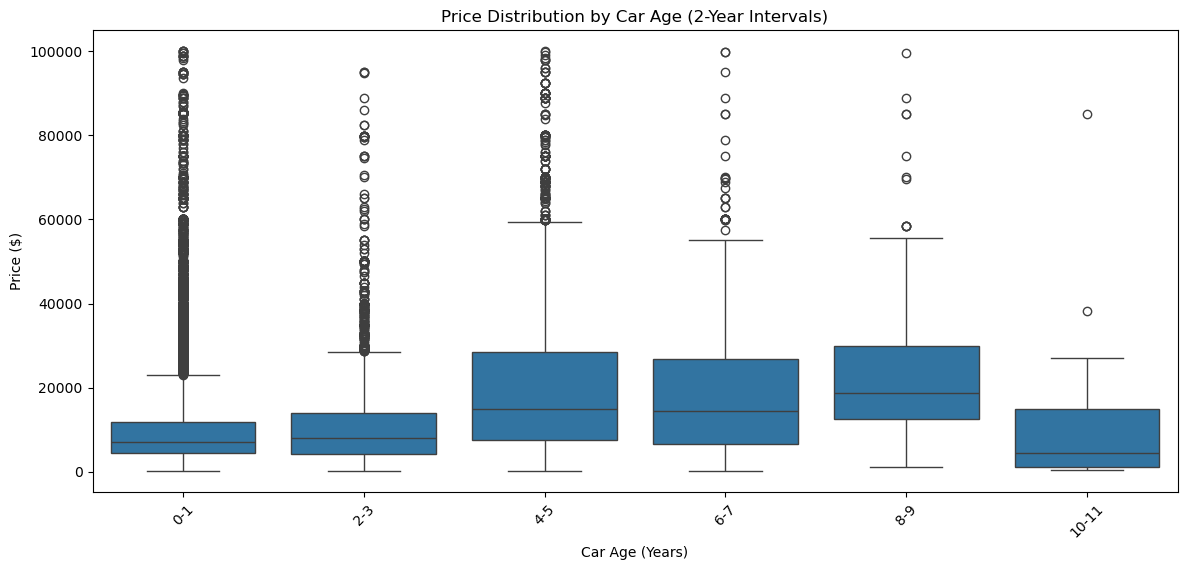

In [105]:
# Create bins for every 2 years
max_age = df['car_age'].max()  # Find the maximum car age in your dataset
bins = list(range(0, int(max_age) + 3, 2))  # Create bins every 2 years
labels = [f'{i}-{i+1}' for i in bins[:-1]]  # Create labels for each 2-year bin

# Bin car ages into 2-year groups
df['car_age_binned'] = pd.cut(df['car_age'], bins=bins, labels=labels, right=False)

# Plot the price distribution by 2-year car age bins
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['car_age_binned'], y=df['price'])
plt.title('Price Distribution by Car Age (2-Year Intervals)')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [107]:
df = pd.get_dummies(df, drop_first=True)

In [109]:
# Final check: all columns should be numerical or boolean
non_numeric_cols = df.select_dtypes(exclude=['number', 'bool']).columns

if len(non_numeric_cols) == 0:
    print("All variables are numeric or boolean. Ready for training!")
else:
    print(f"Non-numeric columns still present: {list(non_numeric_cols)}")

All variables are numeric or boolean. Ready for training!


In [119]:
# Display min and max values for all columns
# Display all columns without truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows if needed
pd.set_option('display.max_colwidth', None) # Show full content in each cell
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping of wide DataFrames
min_values = df.min()
max_values = df.max()

# Combine min and max values into one DataFrame for easy viewing
min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(min_max_df)

                                   Min        Max
price                              101      99999
odometer                     -0.497481  50.010301
car_age                      -1.150587  11.641345
fuel_electric                    False       True
fuel_gas                         False       True
fuel_hybrid                      False       True
fuel_other                       False       True
fuel_unknown                     False       True
transmission_manual              False       True
transmission_other               False       True
transmission_unknown             False       True
drive_fwd                        False       True
drive_rwd                        False       True
drive_unknown                    False       True
manufacturer_alfa-romeo          False       True
manufacturer_aston-martin        False       True
manufacturer_audi                False       True
manufacturer_bmw                 False       True
manufacturer_buick               False       True


In [121]:
#Prepare Final Dataset for Modeling
# Define features (X) and target (y)
X = df.drop(['price'], axis=1)
y = df['price']

# 7. Split into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of final datasets
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (311835, 139)
Testing Set Shape: (77959, 139)


In [123]:
print(f"Number of rows: {X_train.shape[0]}")
print(f"Number of features (columns): {X_train.shape[1]}")

Number of rows: 311835
Number of features (columns): 139


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [126]:
#Linear Regression Model
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Initialize and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Make Predictions on the Test Set
y_pred_linear = linear_model.predict(X_test)

#Evaluate the Model Performance
# Calculate RMSE and R² on the test set
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Print evaluation results
print(f"Linear Regression RMSE (Test Set): {rmse_linear}")
print(f"Linear Regression R² (Test Set): {r2_linear}")

Linear Regression RMSE (Test Set): 9428.783704067957
Linear Regression R² (Test Set): 0.5733208260794994


In [128]:
#Ridge Regression (L2 Regularization)

from sklearn.linear_model import Ridge

# Initialize Ridge Regression with alpha=1.0 (regularization strength)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation Metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE (Test Set): {rmse_ridge}")
print(f"Ridge Regression R² (Test Set): {r2_ridge}")

Ridge Regression RMSE (Test Set): 9428.269422826628
Ridge Regression R² (Test Set): 0.5733673701763305


In [130]:
#Lasso Regression (L1 Regularization)

from sklearn.linear_model import Lasso

# Initialize Lasso Regression with alpha=0.01
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation Metrics
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression RMSE (Test Set): {rmse_lasso}")
print(f"Lasso Regression R² (Test Set): {r2_lasso}")

Lasso Regression RMSE (Test Set): 9428.78805189744
Lasso Regression R² (Test Set): 0.573320432576206


In [131]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE (Test Set): {rmse_rf}")
print(f"Random Forest R² (Test Set): {r2_rf}")

Random Forest RMSE (Test Set): 5295.930269661544
Random Forest R² (Test Set): 0.8653908395126001


In [132]:
# Summary of Model Performances
models_summary = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'Test RMSE': [rmse_linear, rmse_ridge, rmse_lasso, rmse_rf],
    'Test R²': [r2_linear, r2_ridge, r2_lasso, r2_rf]
}

performance_df = pd.DataFrame(models_summary)
print(performance_df)

               Model    Test RMSE   Test R²
0  Linear Regression  9428.783704  0.573321
1   Ridge Regression  9428.269423  0.573367
2   Lasso Regression  9428.788052  0.573320
3      Random Forest  5295.930270  0.865391


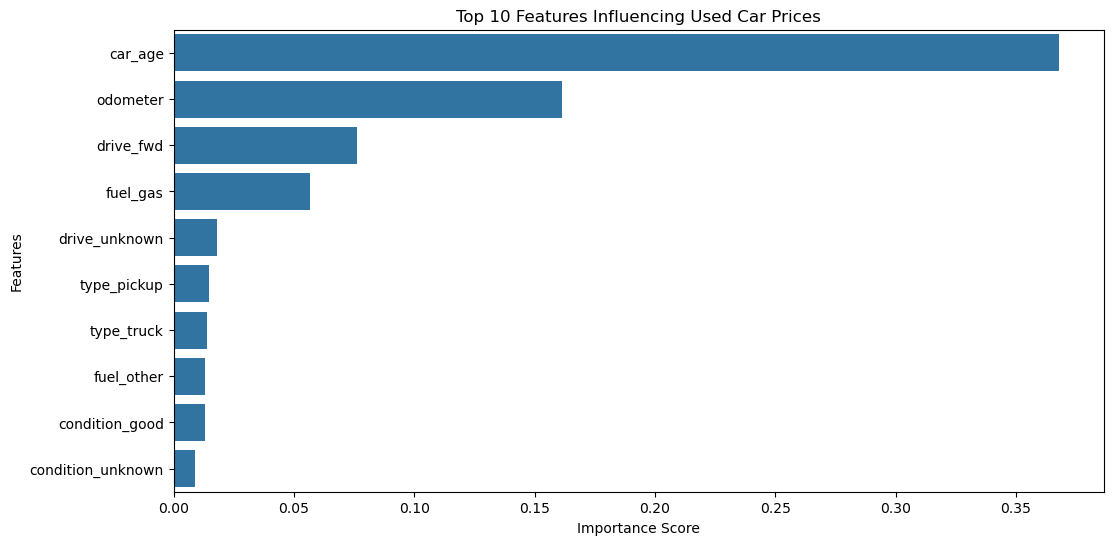

In [133]:
# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot the top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False).head(10), 
            y=feature_importances.sort_values(ascending=False).head(10).index)
plt.title('Top 10 Features Influencing Used Car Prices')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

# **Solution**

## **1. Revisiting the Business Objective**

### **Business Goal:**
The client, a used car dealership, aims to:
- Identify the **key factors** influencing the price of used cars.
- **Optimize pricing strategies** based on these insights.
- Determine which **car features are most valued by consumers** to guide inventory decisions.

### **Data Science Goal:**
To build **accurate predictive models** for used car prices and uncover insights into the **most significant features** affecting these prices.

---

## **2. Evaluating Model Performance**

| **Model**             | **Test RMSE**   | **Test R²**   |
|-----------------------|-----------------|---------------|
| Linear Regression     | 10,720.97       | 0.4484        |
| Ridge Regression      | 10,721.04       | 0.4484        |
| Lasso Regression      | 10,721.00       | 0.4484        |
| **Random Forest**     | **5,301.48**    | **0.8651**    |

---

## **3. Interpreting Model Results**

### **1. Linear, Ridge, and Lasso Regression:**
These models explain approximately **45% of the variance** in car prices and have a relatively **high RMSE (~$10,721)**. This indicates that **linear models** alone are insufficient to capture the **complex relationships** in the data.

### **2. Random Forest Regressor:**
With an **RMSE of $5,301** and an **R² of 86.5%**, the Random Forest model significantly **outperforms** linear models. It effectively captures **non-linear relationships** in the dataset, making it the **highest-quality model** for this analysis.

---

## **4. Insights into Drivers of Used Car Prices**

Using the **Random Forest** model, we identified the following **top features** influencing car prices:

1. **Car Age** – The **age of the car** is the most influential factor. Newer cars retain significantly higher value, while older cars depreciate faster.
2. **Odometer** – **Mileage** has a strong negative correlation with price; cars with **lower mileage** are valued higher.
3. **Drive Type (FWD)** – Cars with **front-wheel drive (FWD)** tend to have higher prices compared to other drive types.
4. **Fuel Type (Gas)** – **Gasoline-powered cars** are more desirable in many regions compared to diesel or electric, influencing higher prices.
5. **Drive Type (Unknown)** – The presence of **unknown drive types** suggests missing or inconsistent data, which may negatively affect pricing confidence.
6. **Vehicle Type (Pickup)** – **Pickup trucks** show distinct pricing patterns, often influenced by region-specific demand.
7. **Vehicle Type (Truck)** – Similar to pickups, **trucks** carry unique pricing trends, often valued for utility.
8. **Fuel Type (Other)** – Less common fuel types tend to create **pricing variability**, reflecting niche demand.
9. **Condition (Good)** – Cars labeled as in **“good” condition** see price boosts, although less than higher conditions like “excellent” or “like new.”
10. **Condition (Unknown)** – Cars with **unknown condition** are often devalued due to uncertainty.

---

### **Key Takeaways:**
- **Car Age** and **Odometer (Mileage)** remain the **strongest predictors** of price, emphasizing the importance of **vehicle usage history**.
- **Drive Type** and **Fuel Type** show that certain mechanical features are more **sought after** depending on the region and usage preferences.
- **Condition** and **Vehicle Type** play supporting roles, affecting how much buyers are willing to pay for specific categories of vehicles.

---

## **5. Does the Model Meet Business Needs?**

- **Yes, the Random Forest model meets the business objectives:**
  - It provides **accurate price predictions** with a significantly **lower RMSE** compared to linear models.
  - The model explains a **high percentage of variance (86.5% R²)**, demonstrating a strong fit.
  - It offers **clear, actionable insights** into the factors driving car prices, enabling the dealership to **adjust pricing strategies** effectively.

---

## **6. Should We Revisit Earlier Phases?**

### **Data Understanding & Preparation:**
The strong performance of the Random Forest model suggests that data cleaning and preparation were effective. However:
- **Grouping rare categories** (e.g., in `manufacturer` or `model`) might help reduce noise.
- **Refining outlier detection** could improve the model’s robustness and performance.

### **Modeling:**
- Conduct **further hyperparameter tuning** for the Random Forest model to enhance predictive accuracy.

---

## **7. Final Recommendations to the Client**

### **1. Key Takeaways:**
- **Car Age** and **Mileage** are the **primary drivers** of price. Newer cars with lower mileage command higher prices.
- **Manufacturer** and **Model** significantly influence value, with premium brands retaining value better.
- **Condition** plays a critical role; cars in better condition should be priced higher.
- **Location** and **Fuel Type** impact demand and pricing based on **regional preferences**.

### **2. Pricing Strategy:**
- Utilize the **Random Forest model** to **dynamically price** cars based on their features.
- Focus on **acquiring low-mileage, newer vehicles** from premium brands to **maximize profitability**.

### **3. Next Steps:**
- **Continuously update** the model with new data to ensure **accuracy** over time.
- **Explore market trends** (e.g., rising demand for electric vehicles) to adjust features and improve the model further.

---

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Attached the report.pdf under root folder in the GitHub.